In [2]:
import numpy as np 
import pandas as pd 
import statsmodels
from statsmodels.tsa.stattools import coint
import statsmodels.api as stat
import statsmodels.tsa.stattools as tsa
import matplotlib
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import datetime
from datetime import date
from mpl_finance import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mdates

In [3]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 12, 31)

btc_df = data.DataReader("BTC-USD", "yahoo", start, end)
btc_df.to_csv(r'/Users/AndyTan/Documents/cointegration_crypto/data/BTC-USD.csv')
btc_df["btc_Adj_Close"] = btc_df["Adj Close"]
btc_df.drop(["Volume", "Adj Close"], axis=1, inplace=True)
btc_df.dropna()

eth_df = data.DataReader("ETH-USD", "yahoo", start, end)
eth_df.to_csv(r'/Users/AndyTan/Documents/cointegration_crypto/data/ETH-USD.csv')
eth_df["eth_Adj_Close"] = eth_df["Adj Close"]
eth_df.drop(["Volume", "Adj Close"], axis=1, inplace=True)
eth_df.dropna()
print("Data Download completed")

Data Download completed


In [4]:
eth_df

,High,Low,Open,Close,eth_Adj_Close
Date,,,,,
2015-12-31,0.975414,0.910277,0.912098,0.933542,0.933542
2016-01-01,0.954822,0.931442,0.933712,0.948024,0.948024
2016-01-02,0.969637,0.936560,0.947401,0.937124,0.937124
2016-01-03,0.991362,0.934313,0.938430,0.971905,0.971905
2016-01-04,0.976438,0.929835,0.972045,0.954480,0.954480
...,...,...,...,...,...
2020-12-27,711.393555,628.334961,635.887146,682.642334,682.642334
2020-12-28,745.877747,683.205811,683.205811,730.397339,730.397339
2020-12-29,737.952881,692.149414,730.358704,731.520142,731.520142


In [5]:
btc_df

,High,Low,Open,Close,btc_Adj_Close
Date,,,,,
2015-12-31,432.920990,418.734985,425.875000,430.566986,430.566986
2016-01-01,436.246002,427.515015,430.721008,434.334015,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,433.091003
...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,26272.294922
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,27362.437500


In [6]:
linear_regression = stat.OLS(eth_df[['eth_Adj_Close']], btc_df[['btc_Adj_Close']]).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          eth_Adj_Close   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              5965.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):                        0.00
Time:                        08:59:46   Log-Likelihood:                         -11865.
No. Observations:                1824   AIC:                                  2.373e+04
Df Residuals:                    1823   BIC:                                  2.374e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
btc_Adj_Close     0.0378      0.000     77.236      0.000       0.037       0.039
==============================================================================
Omnibus:                      655.408   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2379.750
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                       7.345   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
adf_test = tsa.adfuller(linear_regression.resid)
print("P-value calculated: ", np.round(adf_test[1], 4))

P-value calculated:  0.0725


In [8]:
btc_df.reset_index(inplace=True)
btc_df.Date = pd.to_datetime(btc_df.Date)
btc_df["Date"] = btc_df["Date"].apply(mdates.date2num)

eth_df.reset_index(inplace=True)
eth_df.Date = pd.to_datetime(eth_df.Date)
eth_df["Date"] = eth_df["Date"].apply(mdates.date2num)

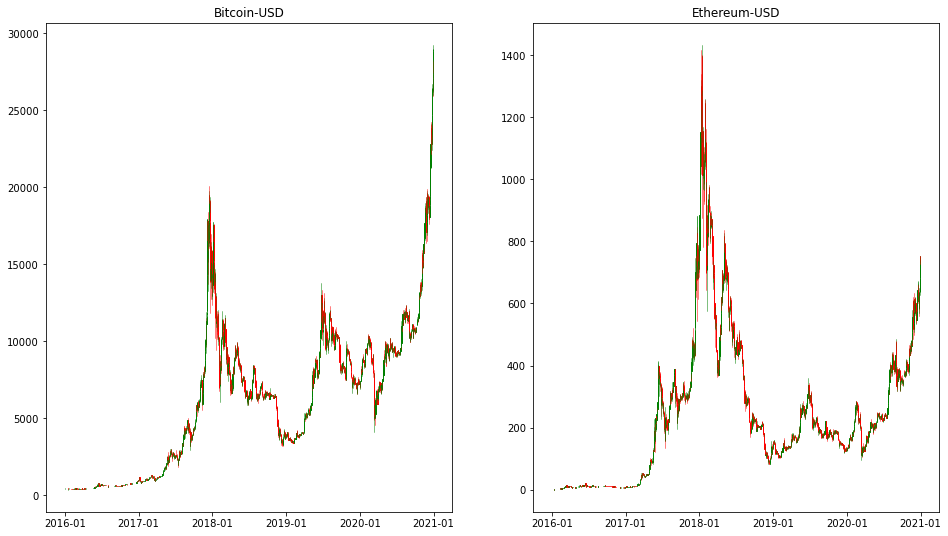

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
ax1.set_title("Bitcoin-USD")
candlestick_ohlc(ax1, btc_df[["Date", "Open", "High", "Low", "Close"]].values, width=0.6, colorup='g', colordown='r')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2.set_title("Ethereum-USD")
candlestick_ohlc(ax2, eth_df[["Date", "Open", "High", "Low", "Close"]].values, width=0.6, colorup='g', colordown='r')
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [10]:
from __future__ import print_function
from collections import deque 
from math import floor
import numpy as np
from qstrader.event import (SignalEvent, EventType) 
from qstrader.strategy.base import AbstractStrategy

class CointegrationBollingerBandsStrategy(AbstractStrategy): 
    """
    Requires: 
    tickers - The list of ticker symbols
    events_queue - A handle to the system events queue lookback - Lookback period for moving avg and moving std weights - The weight vector describing
    a "unit" of the portfolio
    entry_z - The z-score trade entry threshold
    exit_z - The z-score trade exit threshold
    base_quantity - Number of "units" of the portfolio
        to be traded
    """
    def __init__(self, tickers, events_queue, lookback, lookback2, weights, entry_z, exit_z, base_quantity):
        self.tickers = tickers
        self.events_queue = events_queue
        self.lookback = lookback
        self.lookback2 = lookback2
        self.weights = weights
        self.entry_z = entry_z
        self.exit_z = exit_z
        self.qty = base_quantity
        self.time = None
        self.latest_prices = np.full(len(self.tickers), -1.0) 
        self.port_mkt_val = deque(maxlen=self.lookback)
        self.port_lat_val = deque(maxlen=self.lookback2)
        self.invested = None
        self.bars_elapsed = 0

    def _set_correct_time_and_price(self, event):
        """
        Sets the correct price and event time for prices that arrive out of order in the events queue. """
        # Set the first instance of time
        if self.time is None:
            self.time = event.time
        # Set the correct latest prices depending upon # order of arrival of market bar event
        price = event.adj_close_price
        if event.time == self.time:
            for i in range(0, len(self.tickers)):
                if event.ticker == self.tickers[i]: self.latest_prices[i] = price
        else:
            self.time = event.time
            self.bars_elapsed += 1
            self.latest_prices = np.full(len(self.tickers), -1.0) 
            for i in range(0, len(self.tickers)):
                if event.ticker == self.tickers[i]: self.latest_prices[i] = price

    def go_long_units(self): 
        """
        Go long the appropriate number of "units" of the
        portfolio to open a new position or to close out
        a short position.
        """
        for i, ticker in enumerate(self.tickers): 
            if self.weights[i] < 0.0:
                self.events_queue.put(SignalEvent(ticker, "SLD",int(floor(-1.0*self.qty*self.weights[i]))) )

            else: 
                self.events_queue.put(SignalEvent(ticker, "BOT",int(floor(self.qty*self.weights[i]))))
                
    def go_short_units(self):
        """
        Go short the appropriate number of "units" of the portfolio to open a new position or to close out a long position.
        """
        for i, ticker in enumerate(self.tickers):
            if self.weights[i] < 0.0: 
                self.events_queue.put(SignalEvent(ticker, "BOT",int(floor(-1.0*self.qty*self.weights[i]))) )
            else: 
                self.events_queue.put(SignalEvent(ticker, "SLD",int(floor(self.qty*self.weights[i]))))
                
                
    def zscore_trade(self, zscore, event): 
        """
        Determine whether to trade if the entry or exit zscore
        threshold has been exceeded.
        """
        # If we’re not in the market...
        if self.invested is None:
            if zscore < -self.entry_z:
                # Long Entry
                print("LONG: %s" % event.time) 
                self.go_long_units() 
                self.invested = "long"
                
            elif zscore > self.entry_z: # Short Entry
                print("SHORT: %s" % event.time) 
                self.go_short_units() 
                self.invested = "short"
            
        # if we are in the market...
        if self.invested is not None:
            
            if self.invested == "long" and zscore >= -self.exit_z:
                print("CLOSING LONG: %s" % event.time) 
                self.go_short_units()
                self.invested = None
            elif self.invested == "short" and zscore <= self.exit_z: 
                print("CLOSING SHORT: %s" % event.time) 
                self.go_long_units()
                self.invested = None
                
    def calculate_signals(self, event):
        """
        Calculate the signals for the strategy. """
        if event.type == EventType.BAR:
            self._set_correct_time_and_price(event)
            # Only trade if we have all prices
            if all(self.latest_prices > -1.0):
                # Calculate portfolio market value via dot product # of crypto prices with portfolio weights 
                self.port_mkt_val.append(np.dot(self.latest_prices, self.weights))
                # If there is enough data to form a full lookback # window, then calculate zscore and carry out
                # respective trades if thresholds are exceeded
                self.port_lat_val.append(np.dot(self.latest_prices, self.weights))
                if self.bars_elapsed > self.lookback2:
                    zscore = (np.mean(self.port_lat_val) - np.mean(self.port_mkt_val)) / np.std(self.port_mkt_val)
                    self.zscore_trade(zscore, event)
                

Running Backtest...
LONG: 2016-03-12 00:00:00
CLOSING LONG: 2016-04-14 00:00:00
SHORT: 2016-04-15 00:00:00
CLOSING SHORT: 2016-05-20 00:00:00
LONG: 2016-05-21 00:00:00
CLOSING LONG: 2016-06-06 00:00:00
SHORT: 2016-06-07 00:00:00
CLOSING SHORT: 2016-08-11 00:00:00
LONG: 2016-08-12 00:00:00
CLOSING LONG: 2016-10-11 00:00:00
SHORT: 2016-10-12 00:00:00
CLOSING SHORT: 2017-03-14 00:00:00
LONG: 2017-03-19 00:00:00
CLOSING LONG: 2017-07-13 00:00:00
SHORT: 2017-07-16 00:00:00
CLOSING SHORT: 2017-08-25 00:00:00
LONG: 2017-08-30 00:00:00
CLOSING LONG: 2017-09-11 00:00:00
SHORT: 2017-10-03 00:00:00
CLOSING SHORT: 2017-12-22 00:00:00
LONG: 2017-12-23 00:00:00
CLOSING LONG: 2018-02-27 00:00:00
SHORT: 2018-02-28 00:00:00
CLOSING SHORT: 2018-04-29 00:00:00
LONG: 2018-04-30 00:00:00
CLOSING LONG: 2018-06-13 00:00:00
SHORT: 2018-06-14 00:00:00
CLOSING SHORT: 2018-12-26 00:00:00
LONG: 2018-12-27 00:00:00
CLOSING LONG: 2019-02-07 00:00:00
LONG: 2019-02-14 00:00:00
CLOSING LONG: 2019-04-05 00:00:00
SHORT:

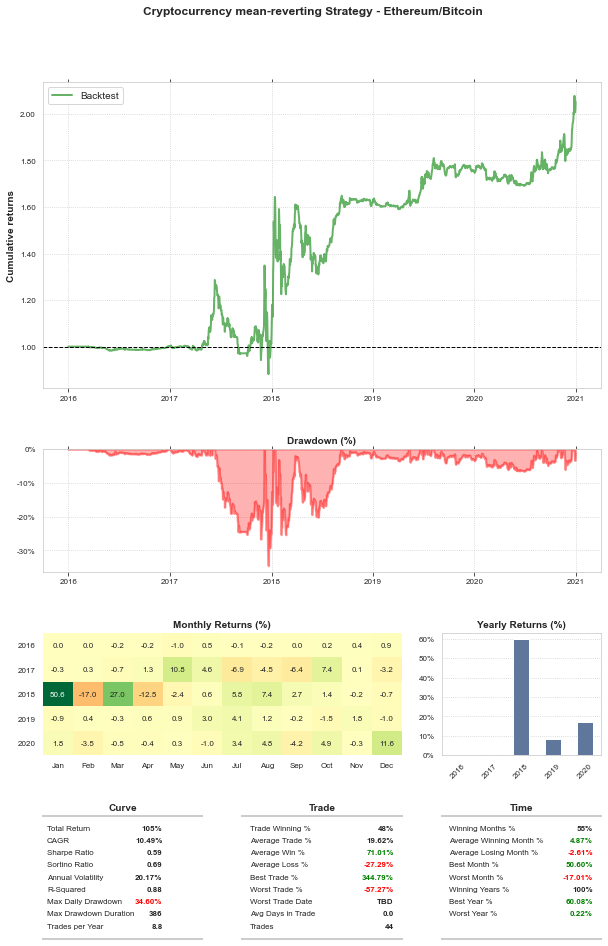

saving plots to output directory


In [11]:
from munch import munchify
import datetime 
import click
import numpy as np
import queue 
from qstrader.price_handler.yahoo_daily_csv_bar import YahooDailyCsvBarPriceHandler
from qstrader.execution_handler.ib_simulated import IBSimulatedExecutionHandler
from qstrader.statistics.tearsheet import TearsheetStatistics
from qstrader.trading_session import TradingSession
from qstrader.portfolio_handler import PortfolioHandler
from qstrader.compliance.example import ExampleCompliance
import warnings
warnings.filterwarnings('ignore')


def run(config, tickers, filename):
    # Set up variables needed for backtest
    events_queue = queue.Queue()
    csv_dir = config.CSV_DATA_DIR
    initial_equity = 10000000.00
   
    # Use Yahoo Daily Price Handler
    start_date = datetime.datetime(2016, 1, 1) 
    end_date = datetime.datetime(2020, 12, 31) 
    price_handler = YahooDailyCsvBarPriceHandler(csv_dir, events_queue, tickers,start_date=start_date, 
                                                 end_date=end_date)
    # Use the Cointegration Bollinger Bands trading strategy
    weights = np.array([1.0, -0.038])
    lookback = 5
    lookback2 = 70
    entry_z = 3.0
    exit_z = -2.0
    base_quantity = 10000
    strategy = CointegrationBollingerBandsStrategy(tickers, events_queue,lookback, lookback2, weights,
                                                   entry_z, exit_z, base_quantity)
    
    portfolio_handler = PortfolioHandler(initial_equity, events_queue, price_handler) 
    
    # Use the ExampleCompliance component
    compliance = ExampleCompliance(config)
    # Use a simulated IB Execution Handler
    execution_handler = IBSimulatedExecutionHandler( events_queue, price_handler, compliance)
    # Use the Tearsheet Statistics
    title = ["Cryptocurrency mean-reverting Strategy - Ethereum/Bitcoin"]
    statistics = TearsheetStatistics(config, portfolio_handler, title)
    
    # Set up the backtest
    backtest = TradingSession(config, tickers, start_date, end_date, events_queue, session_type="backtest",
                              price_handler=price_handler,end_session_time=None,compliance=compliance, 
                              strategy=strategy, portfolio_handler=portfolio_handler, 
                              execution_handler=execution_handler, statistics=statistics , 
                              initial_equity=initial_equity, title=title, benchmark=None)
    
    results = backtest.start_trading() 
    statistics.save(filename)
    return results
                        # Change below to your own directory, 
                        # Please also change the tradelog directory from example.py
def main(config=munchify({"CSV_DATA_DIR": '/Users/AndyTan/Documents/cointegration_crypto'+"/data", 
                          "OUTPUT_DIR":'/Users/AndyTan/Documents/cointegration_crypto'+"/out"}),
         tickers="ETH-USD,BTC-USD", filename=""):
    tickers = tickers.split(",")
    run(config, tickers, filename)
    
if __name__ == "__main__":
    main()
    